In [323]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [324]:
url_link = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
result = requests.get(url_link)

In [325]:
# Create a BeautifulSoup object with the HTML content of the page
soup = BeautifulSoup(result.content, 'html.parser')

# Find the table with class 'wikitable' on the page
table = soup.find('table', {'class': 'wikitable'})

# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]

# Drop the first row since it contains the column headers twice
df = df.drop(0)

# Reset the index to start from 0
df = df.reset_index(drop=True)

# Rename the columns
df.columns = ['Country/Territory', 'UN Region', 'IMF (Estimate)', 'IMF (Year)', 'World Bank (Estimate)', 'World Bank (Year)', 'United Nations (Estimate)', 'United Nations (Year)']

# Print the first 5 rows of the DataFrame
df.head()

,Country/Territory,UN Region,IMF (Estimate),IMF (Year),World Bank (Estimate),World Bank (Year),United Nations (Estimate),United Nations (Year)
0,Monaco *,Europe,—,—,234316,2021,234317,2021
1,Liechtenstein *,Europe,—,—,157755,2020,169260,2021
2,Luxembourg *,Europe,127673,2022,133590,2021,133745,2021
3,Bermuda *,Americas,—,—,114090,2021,112653,2021
4,Ireland *,Europe,102217,2022,100172,2021,101109,2021


In [326]:
df.dtypes

Country/Territory            object
UN Region                    object
IMF (Estimate)               object
IMF (Year)                   object
World Bank (Estimate)        object
World Bank (Year)            object
United Nations (Estimate)    object
United Nations (Year)        object
dtype: object

In [327]:
df['Country/Territory'] = df['Country/Territory'].str.replace('*', '')

/var/folders/n2/nncp4h0d50v2ldjj1sv35ph00000gn/T/ipykernel_77502/1097056344.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Country/Territory'] = df['Country/Territory'].str.replace('*', '')


In [328]:
df[['IMF (Estimate)', 'World Bank (Estimate)', 'United Nations (Estimate)']] = df[['IMF (Estimate)', 'World Bank (Estimate)', 'United Nations (Estimate)']].apply(pd.to_numeric, errors='coerce')

In [329]:
df['GDPperCap'] = df[['IMF (Estimate)', 'World Bank (Estimate)', 'United Nations (Estimate)']].mean(axis=1).round(2)
df['deviation'] = df[['IMF (Estimate)', 'World Bank (Estimate)', 'United Nations (Estimate)']].std(axis=1).round(2)

In [330]:
df.rename(columns={'Country/Territory': 'Country'}, inplace=True)

In [331]:
df1 = df[['Country', 'United Nations (Year)', 'GDPperCap']]

In [332]:
df1.head()

,Country,United Nations (Year),GDPperCap
0,Monaco,2021,234316.50
1,Liechtenstein,2021,163507.50
2,Luxembourg,2021,131669.33
3,Bermuda,2021,113371.50
4,Ireland,2021,101166.00


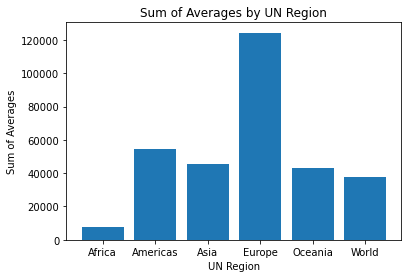

In [333]:
import matplotlib.pyplot as plt
# Compute the average across columns for each region and sum the results by region
region_sum = df.groupby('UN Region')[['IMF (Estimate)', 'World Bank (Estimate)', 'United Nations (Estimate)']].mean().sum(axis=1)

# Plot the results as a bar chart
plt.bar(region_sum.index, region_sum.values)

# Set the chart title and axis labels
plt.title('Sum of Averages by UN Region')
plt.xlabel('UN Region')
plt.ylabel('Sum of Averages')

# Display the chart
plt.show()

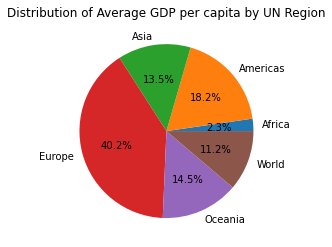

In [334]:
#Group Data by UN Region
grouped = df.groupby(['UN Region'])

# Compute total average GDP per capita for each region
avggdp = grouped['GDPperCap'].mean()

# Create a pie chart
plt.pie(avggdp, labels=avggdp.index, autopct='%1.1f%%')
plt.title('Distribution of Average GDP per capita by UN Region')

# Show the plot
plt.show()

In [335]:
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
result2 = requests.get(url2)

In [336]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(result2.content, 'html.parser')

# Find the first table in the page
table2 = soup.find('table', {'class': 'wikitable'})

# Convert the table to a Pandas DataFrame
df2 = pd.read_html(str(table2))[0]

# Select the Indexes needed
df2 = df2[['Country / Dependency', 'Population']]

df2.columns = df2.columns.get_level_values(1)

df2 = df2[['Country / Dependency', 'Numbers']]

df2.head()

,Country / Dependency,Numbers
0,World,8020937000
1,China,1411750000
2,India,1388163000
3,United States,334536000
4,Indonesia,275773800


In [337]:
df2.dtypes

Country / Dependency    object
Numbers                  int64
dtype: object

In [338]:
df2.rename(columns={'Country / Dependency': 'Country', 'Numbers': 'Population'}, inplace=True)
print(df2.columns)

Index(['Country', 'Population'], dtype='object')


In [339]:
print(df1.shape)
print(df2.shape)

(223, 3)
(242, 2)
